## Notebook 3:

The neural network expects a Tensor of a certain size as input and, so, to detect any face, some pre-processing needs to be done.

1. Detect all the faces in an image using a face detector (I'll be using a Haar Cascade detector in this notebook).
2. Pre-process those face images so that they are grayscale, and transformed to a Tensor of the input size neural net expects.
3. Use trained model to detect facial keypoints on the image.

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

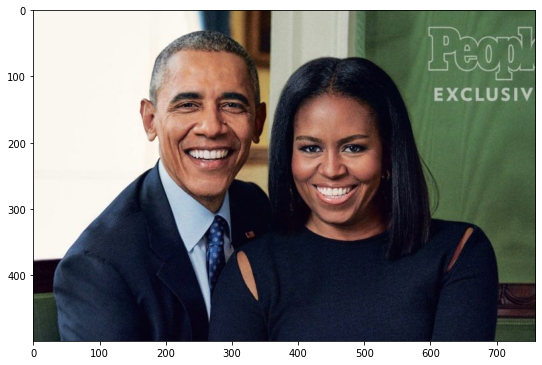

In [2]:
import cv2
image = cv2.imread('obamas.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(9,9))
plt.imshow(image)

### Detect all faces in an image using Haar Cascades classifier

Looping over each face in the original image and drawing a red square on each face.


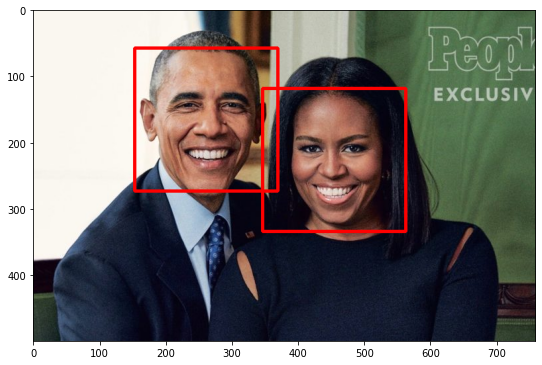

In [3]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(image, 3, 2)
image_with_detections = image.copy()
# loop over the detected faces, mark the image where each face is found
for (x,y,w,h) in faces:
    cv2.rectangle(image_with_detections,(x,y),(x+w,y+h),(255,0,0),3) 
fig = plt.figure(figsize=(9,9))
plt.imshow(image_with_detections)

## Loading in a trained model

In [ ]:
import torch
from models import Net
net = Net()
net.load_state_dict(torch.load('saved_models/keypoints_model_2.pt'))

In [ ]:
net.eval()

Net(
  (conv1): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(8, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(128, 256, kernel_size=(5, 5), stride=(1, 1))
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=25600, out_features=5000, bias=True)
  (cl_drop): Dropout(p=0.4)
  (fc1_drop): Dropout(p=0.3)
  (fc2): Linear(in_features=5000, out_features=500, bias=True)
  (fc2_drop): Dropout(p=0.5)
  (fc3): Linear(in_features=500, out_features=136, bias=True)
)


### Detect and display the predicted keypoints


Convert the face from RGB to grayscale

Normalize the grayscale image so that its color range falls in [0,1] instead of [0,255]

Rescale the detected face to be the expected square size for your CNN (224x224, suggested)

Reshape the numpy image into a torch image.

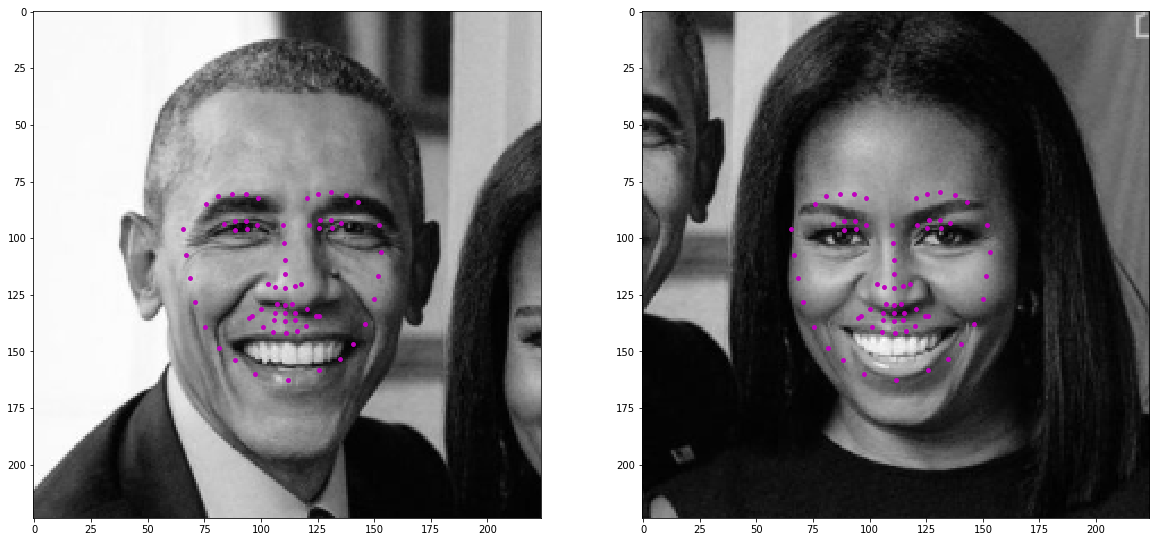

In [ ]:
image_copy = np.copy(image)
plt.figure(figsize=(20,10))
i=0
for(x,y,w,h) in (faces):
    
    ax = plt.subplot(1, 2, i+1)
    w_pad = int(w*0.2)
    h_pad = int(h*0.2)
    
    roi = image_copy[y-h_pad:y+h+h_pad, x-w_pad:x+w+w_pad]    # Select the region of interest that is the face in the image 

    roi_copy = cv2.cvtColor(roi, cv2.COLOR_RGB2GRAY)

    roi_copy = roi_copy/255.0
    
    roi_copy = cv2.resize(roi_copy, (224, 224))

    roi_tensor = torch.from_numpy(roi_copy.reshape(1,1,224,224))  # .transpose((2, 0, 1)))

    roi_tensor = roi_tensor.type(torch.FloatTensor)

    output_pts = net(roi_tensor)


    torch.squeeze(output_pts)             
    output_pts = output_pts.view(68, -1)
    predicted_key_pts = output_pts.data.numpy()

    predicted_key_pts = predicted_key_pts*50.0+100
    
    plt.imshow(roi_copy, cmap='gray')
    plt.scatter(predicted_key_pts[:, 0], predicted_key_pts[:, 1], s=60, marker='.', c='m')
    i+=1
plt.show()
